Índice de contenidos<a id='toc0_'></a>    
- 1. [Trabajo Previo](#toc1_)    
  - 1.1. [Importación de librerias](#toc1_1_)    
  - 1.2. [Carga de datasets](#toc1_2_)    
  - 1.3. [Estructura de Datos](#toc1_3_)    
  - 1.4. [Detección de Nulos](#toc1_4_)    
    - 1.4.1. [Funciones](#toc1_4_1_)    
    - 1.4.2. [Criterios](#toc1_4_2_)    
    - 1.4.3. [Nulos con relevancia baja](#toc1_4_3_)    
    - 1.4.4. [Nulos con relevancia alta](#toc1_4_4_)    
    - 1.4.5. [Nulos con relevancia media](#toc1_4_5_)    
  - 1.5. [Valores Duplicados](#toc1_5_)    
  - 1.6. [Análisis univariable](#toc1_6_)    
    - 1.6.1. [Valores únicos](#toc1_6_1_)    
    - 1.6.2. [Fechas](#toc1_6_2_)    
    - 1.6.3. [Histogramas](#toc1_6_3_)    
- 2. [Preprocesamiento](#toc2_)    
    - 2.1.1. [Correlaciones](#toc2_1_1_)    
- 3. [Matriz de Correlacion](#toc3_)    
    - 3.1.1. [Análisis del Target](#toc3_1_1_)    
    - 3.1.2. [Simetría](#toc3_1_2_)    
    - 3.1.3. [Análisis entre el Target y las Variables Independientes](#toc3_1_3_)    
- 4. [Categorizacion de columnas](#toc4_)    
    - 4.1.1. [Funciones](#toc4_1_1_)    
    - 4.1.2. [Modificaciones en los tipos de datos](#toc4_1_2_)    
- 5. [Codificación OneHot](#toc5_)    
      - 5.1.1.1. [¿Cómo Funciona?](#toc5_1_1_1_)    
      - 5.1.1.2. [Importancia](#toc5_1_1_2_)    
    - 5.1.2. [Segunda comprobación de correlaciones](#toc5_1_2_)    
- 6. [Conclusiones del dataset](#toc6_)    
- 7. [Herramientas para documentar en Word](#toc7_)    
  - 7.1. [Filas eliminadas](#toc7_1_)    
- 8. [Guardado del Dataset](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Trabajo Previo](#toc0_)

## 1.1. <a id='toc1_1_'></a>[Importación de librerias](#toc0_)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

## 1.2. <a id='toc1_2_'></a>[Carga de datasets](#toc0_)

Lectura del fichero de IMDB

In [2]:
folder = "../datasets"
file = "bmw_pricing_v3.csv"
bmw=pd.read_csv(os.path.join(folder, file))

## 1.3. <a id='toc1_3_'></a>[Estructura de Datos](#toc0_)

Comprobamos la estructura de las primeras 5 filas del dataset.

In [3]:
bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


Se comprueba el tipo de datos que ha clasificado python automaticamente.

In [4]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

Se realiza una copia para poder trabajar cómodamente, en caso de error es posible reestablecer el dataset en esta celda.

In [5]:
df = bmw.copy()

Se ajustan el tipo de datos de las fechas

In [6]:
df['fecha_registro'] = pd.to_datetime(df['fecha_registro'])
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

Se comprueba como se han realizado los cambios.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

## 1.4. <a id='toc1_4_'></a>[Detección de Nulos](#toc0_)

### 1.4.1. <a id='toc1_4_1_'></a>[Funciones](#toc0_)

In [8]:
def calculate_null_stats(df):
    """
    Calcula estadísticas sobre valores nulos en un DataFrame.

    Parametros:
    df (pandas.DataFrame): El DataFrame para el cual se calcularán las estadísticas de valores nulos.

    Retorno:
    pandas.DataFrame: Un nuevo DataFrame con las siguientes columnas:
        - Total Rows: Número total de filas en el DataFrame original.
        - Null Count: Número de valores nulos en cada columna.
        - Not Null Count: Número de valores no nulos en cada columna.
        - Null Percentage: Porcentaje de valores nulos en cada columna.
    """
    total_rows = len(df)
    null_counts = df.isnull().sum()
    not_null_counts = df.notnull().sum()
    null_percentage = round((null_counts / total_rows) * 100, 2)

    result_df = pd.DataFrame({
        'Total Rows': total_rows,
        'Null Count': null_counts,
        'Not Null Count': not_null_counts,
        'Null Percentage': null_percentage
    })

    result_df.index = df.columns
    result_df = result_df.sort_values(by='Null Percentage', ascending=False)
    return result_df


### 1.4.2. <a id='toc1_4_2_'></a>[Criterios](#toc0_)

Obtenemos estadisticas sobre los nulos.

In [9]:
nulos = calculate_null_stats(df)
nulos

,Total Rows,Null Count,Not Null Count,Null Percentage
asientos_traseros_plegables,4843,3391,1452,70.02
fecha_registro,4843,2423,2420,50.03
tipo_coche,4843,1460,3383,30.15
marca,4843,970,3873,20.03
alerta_lim_velocidad,4843,728,4115,15.03
bluetooth,4843,728,4115,15.03
aire_acondicionado,4843,486,4357,10.04
color,4843,445,4398,9.19
precio,4843,6,4837,0.12
tipo_gasolina,4843,5,4838,0.10


Establecemos umbrales y segmentamos la importancia de los nulos en 3 categorias:

In [10]:
limite_inferior = 1
limite_superior = 80

nulos_baja_relevancia = nulos[nulos['Null Percentage'] < limite_inferior]
nulos_media_relevancia = nulos[(nulos['Null Percentage'] >= limite_inferior) & (nulos['Null Percentage'] <= limite_superior)]
nulos_alta_relevancia = nulos[nulos['Null Percentage'] > limite_superior]

### 1.4.3. <a id='toc1_4_3_'></a>[Nulos con relevancia baja](#toc0_)

In [11]:
nulos_baja_relevancia

,Total Rows,Null Count,Not Null Count,Null Percentage
precio,4843,6,4837,0.12
tipo_gasolina,4843,5,4838,0.10
volante_regulable,4843,4,4839,0.08
modelo,4843,3,4840,0.06
camara_trasera,4843,2,4841,0.04
elevalunas_electrico,4843,2,4841,0.04
km,4843,2,4841,0.04
potencia,4843,1,4842,0.02
fecha_venta,4843,1,4842,0.02
gps,4843,0,4843,0.00


In [12]:
df2 = df.copy()

Como su relevancia es baja los filtramos

In [13]:
df2.dropna(subset=nulos_baja_relevancia.index, inplace=True)

In [14]:
df2[nulos_baja_relevancia.index].isnull().sum()

precio                  0
tipo_gasolina           0
volante_regulable       0
modelo                  0
camara_trasera          0
elevalunas_electrico    0
km                      0
potencia                0
fecha_venta             0
gps                     0
dtype: int64

### 1.4.4. <a id='toc1_4_4_'></a>[Nulos con relevancia alta](#toc0_)

In [15]:
df3 = df2.copy()
nulos_alta_relevancia

,Total Rows,Null Count,Not Null Count,Null Percentage


Los nulos de alta relevancia no aportan información, deben borrarse las columnas (En este caso no hay)

In [16]:
df3.drop(columns=nulos_alta_relevancia.index, inplace=True)

### 1.4.5. <a id='toc1_4_5_'></a>[Nulos con relevancia media](#toc0_)

In [17]:
df4 = df3.copy()

In [18]:
df4[nulos_media_relevancia.index].head()

,asientos_traseros_plegables,fecha_registro,tipo_coche,marca,alerta_lim_velocidad,bluetooth,aire_acondicionado,color
0,NaN,2012-02-01,NaN,NaN,NaN,NaN,True,black
1,NaN,NaT,convertible,BMW,True,True,True,grey
2,NaN,2012-04-01,NaN,BMW,False,False,False,white
3,NaN,NaT,convertible,BMW,NaN,True,True,red
4,False,NaT,NaN,BMW,True,True,True,silver


1. Los registros sin fecha no nos interesan, pues consideramos que la fecha es un parámetro muy importante para predecir el precio de un vehículo.

In [19]:
df4.dropna(subset=['fecha_registro'], inplace=True)

2. Como estamos realizando el estudio de la marca BMW, esta columna no aporta información. Nos quedamos con los nulos porque se entiende que son marca BMW.

In [20]:
df4['marca'].value_counts(dropna=False) 

marca
BMW    1912
NaN     496
Name: count, dtype: int64

Sin embargo, ahora la marca ya no aporta información relevante porque entendemos que todos los registros son marca BMW.

In [21]:
df4.drop(columns=['marca'], inplace=True)

Para el tipo de coche y el color comprobamos los valores existentes

In [22]:
df4['tipo_coche'].value_counts(dropna=False)

tipo_coche
NaN            736
estate         553
sedan          419
suv            386
hatchback      219
coupe           38
subcompact      33
van             13
convertible     11
Name: count, dtype: int64

In [23]:
df4['color'].value_counts(dropna=False)

color
black     764
grey      522
blue      319
white     246
NaN       221
brown     145
silver    142
red        21
beige      18
green       8
orange      2
Name: count, dtype: int64

Para reemplazar los valores nulos no podemos utilizar la moda porque vemos como los valores nulos son predominantes entre las distintas categorias.

Para el resto de columnas, que son booleanas, el no disponer de la información limita nuestras opciones.

Como la relevancia es media y la presencia de nulos es considerable consideramos crear una nueva categoría llamada 'unknown'.

In [24]:
columnas = ['asientos_traseros_plegables', 'alerta_lim_velocidad', 'bluetooth', 'aire_acondicionado', 'tipo_coche', 'color']

for i in columnas:
    df4[i].fillna("Unknown", inplace=True)

In [25]:
df4[columnas[1]].value_counts(dropna=False)

alerta_lim_velocidad
True       1117
False       910
Unknown     381
Name: count, dtype: int64

Se comprueban de nuevo los nulos:

In [26]:
df4.isna().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

In [27]:
df_nonull = df4.copy()

## 1.5. <a id='toc1_5_'></a>[Valores Duplicados](#toc0_)

In [28]:
df5 = df_nonull.copy()

In [29]:
df5.duplicated().sum()

0

No existen duplicados

In [30]:
df_noduplicates = df5.copy()

## 1.6. <a id='toc1_6_'></a>[Análisis univariable](#toc0_)

In [31]:
df6 = df_noduplicates.copy()

### 1.6.1. <a id='toc1_6_1_'></a>[Valores únicos](#toc0_)

In [32]:
def etiquetar_porcentaje(df, columna, porcentaje_minimo, texto):
    """
    Esta funcion reetiqueta los valores en una columna de un DataFrame que no cumplen con un umbral minimo de porcentaje.
    
    Parametros:
    df (pandas.DataFrame): El DataFrame sobre el cual se aplica la funcion.
    columna (str): El nombre de la columna a evaluar.
    porcentaje_minimo (float): El porcentaje minimo requerido para que un valor mantenga su etiqueta original. Debe estar entre 0 y 1.
    texto (str): El texto que se utilizara para reemplazar los valores que no cumplen con el porcentaje minimo.
    
    Retorna:
    pandas.DataFrame: El DataFrame modificado con los valores reetiquetados.
    
    """
    frecuencia_relativa = df[columna].value_counts(normalize=True)
    valores_filtrados = frecuencia_relativa[frecuencia_relativa >= porcentaje_minimo].index.tolist()
    
    # Etiquetar como 'Others' los valores que no cumplen con el porcentaje mínimo
    df[columna] = df.apply(lambda x: x[columna] if x[columna] in valores_filtrados else texto, axis=1)

    return df

Analicemos la variable 'modelo' y encontramos demasiados modelos cuya presencia es pequeña en comparación al resto.

In [33]:
df6['modelo'].value_counts(normalize=True)

modelo
320                 0.149502
520                 0.139120
318                 0.118771
X3                  0.094684
116                 0.065199
                      ...   
430                 0.000415
335 Gran Turismo    0.000415
635                 0.000415
523                 0.000415
750                 0.000415
Name: proportion, Length: 64, dtype: float64

Agrupamos todos los casos menores al 2% en un grupo llamado 'Others'

In [34]:
df6 = etiquetar_porcentaje(df6, 'modelo', 0.02, 'Others')
df6['modelo'].value_counts(normalize=True)

modelo
Others    0.183555
320       0.149502
520       0.139120
318       0.118771
X3        0.094684
116       0.065199
X1        0.055233
316       0.048588
X5        0.046927
525       0.040282
530       0.031146
118       0.026993
Name: proportion, dtype: float64

Analizamos el resto de columnas:

In [35]:
no_print = ['potencia', 'km', 'fecha_registro', 'fecha_venta', 'modelo', 'precio']
for i in df6.columns:
    if i not in no_print:
        print('\n', i, df6[i].value_counts(),'\n')


 tipo_gasolina tipo_gasolina
diesel           2311
petrol             90
Diesel              3
electro             2
hybrid_petrol       2
Name: count, dtype: int64 


 color color
black      764
grey       522
blue       319
white      246
Unknown    221
brown      145
silver     142
red         21
beige       18
green        8
orange       2
Name: count, dtype: int64 


 tipo_coche tipo_coche
Unknown        736
estate         553
sedan          419
suv            386
hatchback      219
coupe           38
subcompact      33
van             13
convertible     11
Name: count, dtype: int64 


 volante_regulable volante_regulable
True     1324
False    1084
Name: count, dtype: int64 


 aire_acondicionado aire_acondicionado
True       1742
False       415
Unknown     251
Name: count, dtype: int64 


 camara_trasera camara_trasera
False    1922
True      486
Name: count, dtype: int64 


 asientos_traseros_plegables asientos_traseros_plegables
Unknown    1687
False       575
True        14

Tipo de gasolina: Agrupamos los registros cambiando todo a letras minúsculas

In [36]:
df6['tipo_gasolina'] = df6['tipo_gasolina'].str.lower()
df6['tipo_gasolina'].value_counts(normalize=True)

tipo_gasolina
diesel           0.960963
petrol           0.037375
electro          0.000831
hybrid_petrol    0.000831
Name: proportion, dtype: float64

Como el 96% del dataset trata sobre diesel. Centraremos los modelos en estudios y predicions sobre este combustible pues no valoraremos bien el resto de automóviles. Por tanto, dejamos únicamente los registros de diesel.

In [37]:
df6 = df6[df6['tipo_gasolina'] == 'diesel']

Ahora como la columna no aporta información, la eliminamos.

In [38]:
del(df6['tipo_gasolina'])

### 1.6.2. <a id='toc1_6_2_'></a>[Fechas](#toc0_)

In [39]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2314 entries, 0 to 4841
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       2314 non-null   object        
 1   km                           2314 non-null   float64       
 2   potencia                     2314 non-null   float64       
 3   fecha_registro               2314 non-null   datetime64[ns]
 4   color                        2314 non-null   object        
 5   tipo_coche                   2314 non-null   object        
 6   volante_regulable            2314 non-null   object        
 7   aire_acondicionado           2314 non-null   object        
 8   camara_trasera               2314 non-null   object        
 9   asientos_traseros_plegables  2314 non-null   object        
 10  elevalunas_electrico         2314 non-null   object        
 11  bluetooth                    2314 non-null   obj

In [40]:
def explotar_fecha(df, lista_fechas):
    for col in lista_fechas:
        df[col + '_NOMBREDIA'] = df[col].dt.day_name()
        df[col + '_DIA'] = df[col].dt.day
        df[col + '_MES'] = df[col].dt.month
        df[col + '_AÑO'] = df[col].dt.year

        del df[col]
    return df

Vemos como las fechas de venta se contabilizan únicamente cada cierto tiempo. Lo analizaremos después de explotar las fechas en varias columnas.

<Axes: >

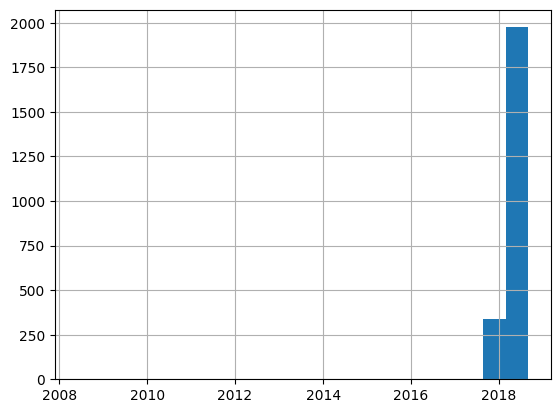

In [41]:
df6['fecha_venta'].hist(bins=20)

Las fechas de registros se encuentran correctamente.

<Axes: >

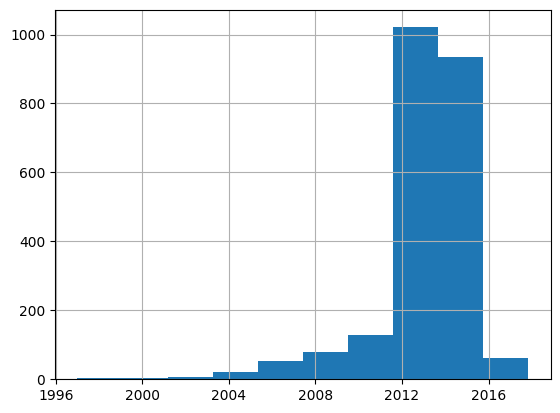

In [42]:
df6['fecha_registro'].hist()

Trataremos de obtener una columna nueva restando la fecha_registro menos la fecha_venta, obtendremos la antiguedad del vehículo en el momento de venta

In [43]:
df6['antiguedad'] = (df6['fecha_venta'] - df6['fecha_registro']).dt.days
df6.head(2)

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,118,140411.0,100.0,2012-02-01,black,Unknown,True,True,False,Unknown,True,Unknown,True,Unknown,11300.0,2018-01-01,2161
2,320,183297.0,120.0,2012-04-01,white,Unknown,False,False,False,Unknown,True,False,True,False,10200.0,2018-02-01,2132


Eliminamos los posibles errores en las fechas

In [44]:
df6[df6['antiguedad'] < 0]

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
100,320,342768.0,135.0,2011-12-01,black,Unknown,False,True,False,Unknown,True,False,True,Unknown,8200.0,2010-04-01,-609
256,316,201102.0,85.0,2013-12-01,black,estate,True,Unknown,False,Unknown,False,False,True,False,8800.0,2008-06-01,-2009


In [45]:
df6 = df6[df6['antiguedad'] >= 0]

Ahora explotamos la fechas a un formato legible para el modelo

In [46]:
lista_fechas = ['fecha_registro', 'fecha_venta']
df6 = explotar_fecha(df6, lista_fechas)

In [47]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 0 to 4841
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       2312 non-null   object 
 1   km                           2312 non-null   float64
 2   potencia                     2312 non-null   float64
 3   color                        2312 non-null   object 
 4   tipo_coche                   2312 non-null   object 
 5   volante_regulable            2312 non-null   object 
 6   aire_acondicionado           2312 non-null   object 
 7   camara_trasera               2312 non-null   object 
 8   asientos_traseros_plegables  2312 non-null   object 
 9   elevalunas_electrico         2312 non-null   object 
 10  bluetooth                    2312 non-null   object 
 11  gps                          2312 non-null   bool   
 12  alerta_lim_velocidad         2312 non-null   object 
 13  precio                 

In [48]:
df6.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,...,precio,antiguedad,fecha_registro_NOMBREDIA,fecha_registro_DIA,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_NOMBREDIA,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
0,118,140411.0,100.0,black,Unknown,True,True,False,Unknown,True,...,11300.0,2161,Wednesday,1,2,2012,Monday,1,1,2018
2,320,183297.0,120.0,white,Unknown,False,False,False,Unknown,True,...,10200.0,2132,Sunday,1,4,2012,Thursday,1,2,2018
12,Others,132025.0,135.0,blue,Unknown,True,Unknown,False,False,True,...,21700.0,1461,Saturday,1,3,2014,Thursday,1,3,2018
13,Others,77061.0,135.0,black,Unknown,True,True,False,Unknown,True,...,36300.0,943,Saturday,1,8,2015,Thursday,1,3,2018
14,Others,174631.0,120.0,Unknown,convertible,True,True,False,False,False,...,10500.0,3377,Thursday,1,1,2009,Sunday,1,4,2018


Veamos cómo se distribuyen los días y meses en las distintas fechas:

In [49]:
for fecha in lista_fechas:
    for col in df6.columns:
        if fecha in col:
            print(df6[col].value_counts())
            print('\n')

fecha_registro_NOMBREDIA
Saturday     368
Tuesday      357
Friday       346
Monday       333
Sunday       322
Thursday     309
Wednesday    277
Name: count, dtype: int64


fecha_registro_DIA
1    2312
Name: count, dtype: int64


fecha_registro_MES
3     241
10    222
1     220
7     220
6     213
4     201
5     192
2     187
9     171
11    170
8     169
12    106
Name: count, dtype: int64


fecha_registro_AÑO
2013    735
2014    620
2012    419
2015    153
2011    110
2010     49
2016     44
2008     41
2009     34
2007     27
2006     25
2005     21
2004      9
2003      7
2017      5
2002      4
1997      4
2001      3
2000      1
1999      1
Name: count, dtype: int64


fecha_venta_NOMBREDIA
Sunday       608
Thursday     606
Tuesday      369
Friday       273
Wednesday    256
Saturday     108
Monday        92
Name: count, dtype: int64


fecha_venta_DIA
1    2312
Name: count, dtype: int64


fecha_venta_MES
5    369
3    361
4    349
6    273
7    259
8    256
2    245
9    108
1     

Se observa como los días siempre son 1 y los eliminamos:

In [50]:
del(df6['fecha_registro_DIA'])
del(df6['fecha_registro_NOMBREDIA'])
del(df6['fecha_venta_DIA'])
del(df6['fecha_venta_NOMBREDIA'])

Las ventas son las de 2018, por tanto, la columna no aporta información. La eliminamos.

In [51]:
del(df6['fecha_venta_AÑO'])

### 1.6.3. <a id='toc1_6_3_'></a>[Histogramas](#toc0_)

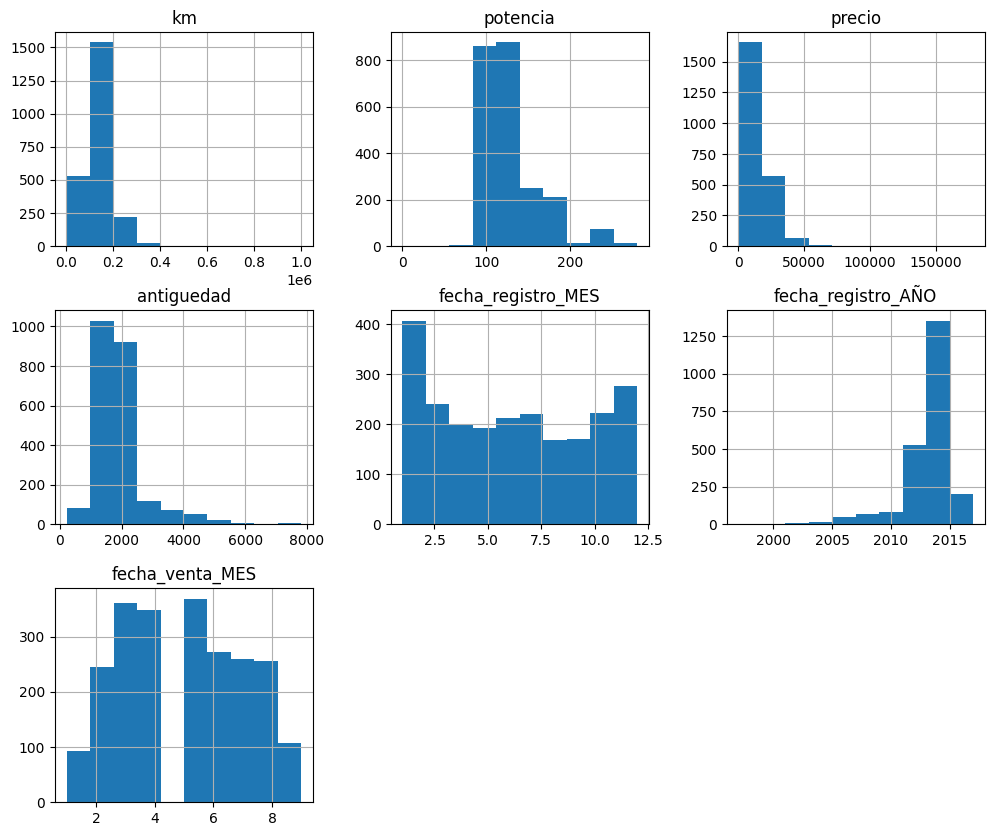

In [52]:
df6.hist(bins=10, figsize=(12, 10))
plt.show()

In [53]:
df_goodtypes = df6.copy()

# 2. <a id='toc2_'></a>[Preprocesamiento](#toc0_)

In [54]:
df8 = df_goodtypes.copy()

### 2.1.1. <a id='toc2_1_1_'></a>[Correlaciones](#toc0_)

In [55]:
df8.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES
0,118,140411.0,100.0,black,Unknown,True,True,False,Unknown,True,Unknown,True,Unknown,11300.0,2161,2,2012,1
2,320,183297.0,120.0,white,Unknown,False,False,False,Unknown,True,False,True,False,10200.0,2132,4,2012,2
12,Others,132025.0,135.0,blue,Unknown,True,Unknown,False,False,True,True,True,Unknown,21700.0,1461,3,2014,3
13,Others,77061.0,135.0,black,Unknown,True,True,False,Unknown,True,True,True,True,36300.0,943,8,2015,3
14,Others,174631.0,120.0,Unknown,convertible,True,True,False,False,False,False,True,False,10500.0,3377,1,2009,4


# 3. <a id='toc3_'></a>[Matriz de Correlacion](#toc0_)

Una matriz de correlacion es una tabla que muestra los coeficientes de correlacion entre un conjunto de variables. Cada celda en la matriz muestra la correlacion entre dos variables. Los valores de la correlacion pueden variar entre -1 y 1, donde:

- 1 indica una correlacion positiva perfecta.
- 0 indica que no hay correlacion.
- -1 indica una correlacion negativa perfecta.

La matriz de correlacion es una herramienta util en el analisis de datos porque ayuda a identificar relaciones lineales entre variables.

In [56]:
corr = df8.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,gps,precio,antiguedad,fecha_registro_MES,fecha_registro_AÑO,fecha_venta_MES
km,1.000000,-0.025375,0.182666,-0.388689,0.519914,-0.026449,-0.518925,0.006188
potencia,-0.025375,1.000000,-0.003652,0.594521,-0.081458,0.012353,0.075413,-0.061619
gps,0.182666,-0.003652,1.000000,-0.021961,0.114992,-0.017438,-0.109711,0.046087
precio,-0.388689,0.594521,-0.021961,1.000000,-0.412001,-0.003301,0.416545,0.023020
antiguedad,0.519914,-0.081458,0.114992,-0.412001,1.000000,-0.046753,-0.988843,0.133843
fecha_registro_MES,-0.026449,0.012353,-0.017438,-0.003301,-0.046753,1.000000,-0.079478,-0.026297
fecha_registro_AÑO,-0.518925,0.075413,-0.109711,0.416545,-0.988843,-0.079478,1.000000,-0.050871
fecha_venta_MES,0.006188,-0.061619,0.046087,0.023020,0.133843,-0.026297,-0.050871,1.000000


In [57]:
def corr_triangulo(df, x=9, y=7):
  """
  Esta funcion genera un mapa de calor de la matriz de correlacion de un DataFrame,
  mostrando solo la parte triangular superior de la matriz para evitar la redundancia.
  
  Parametros:
  df (pandas.DataFrame): El DataFrame del cual se calculara la matriz de correlacion.
  x (int, opcional): El ancho de la figura del mapa de calor. Valor predeterminado es 9.
  y (int, opcional): La altura de la figura del mapa de calor. Valor predeterminado es 7.
  
  Retorna:
  None: Muestra el mapa de calor usando plt.show().
  """
  corr = df.corr(numeric_only = True)
  mask = np.triu(np.ones_like(corr, dtype=bool))
  plt.figure(figsize=(x, y))
  sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, annot=True, fmt=".2f", linewidths=.5, square=True)
  return plt.show()

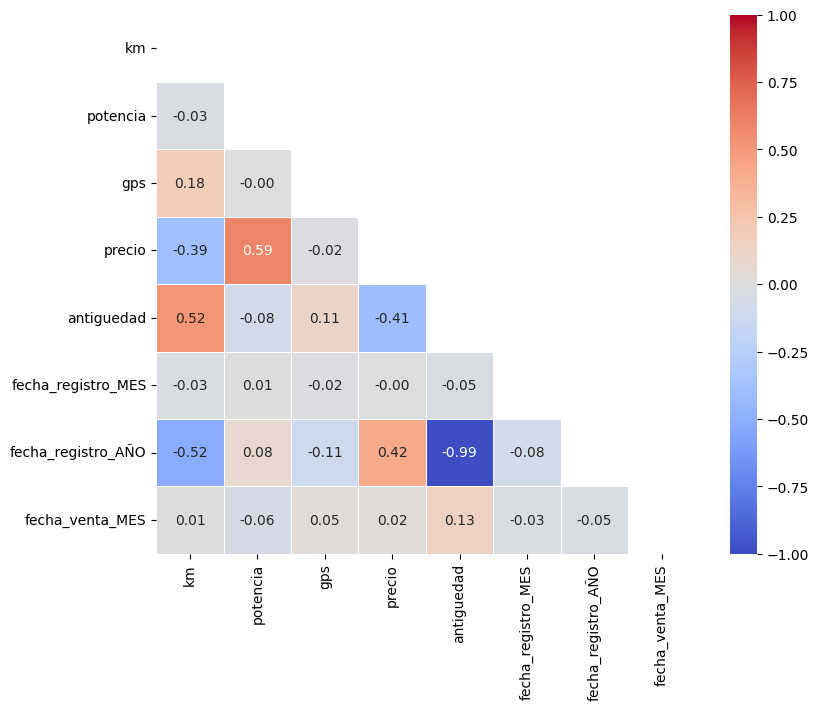

In [58]:
corr_triangulo(df8)

Las correlaciones demuestran una independencia adecuada, excepto por las columnas 'fecha_registro_AÑO' y 'antiguedad'. Mantenemos la antiguedad (en dias) porque el año de registro (en años) aporta menos exactitud.

In [59]:
del(df8['fecha_registro_AÑO'])

### 3.1.1. <a id='toc3_1_1_'></a>[Análisis del Target](#toc0_)

<Axes: >

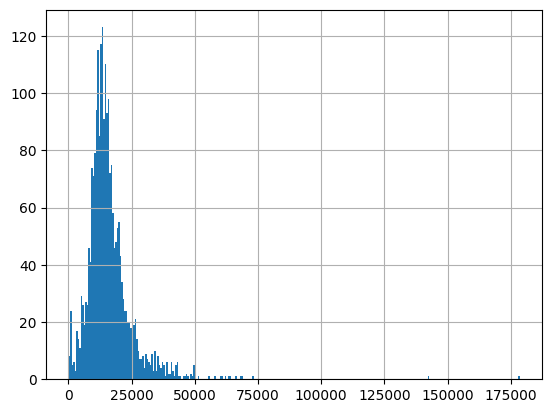

In [60]:
df8['precio'].hist(bins=300)

<Axes: xlabel='precio'>

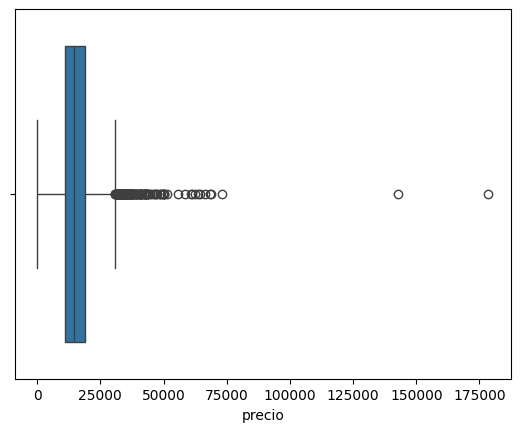

In [61]:
sns.boxplot(x=df8['precio'])

Analizamos los outliers más claros

In [62]:
df8[df8['precio'] > 75000]

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,fecha_registro_MES,fecha_venta_MES
4684,Others,103222.0,140.0,grey,suv,True,True,False,Unknown,True,False,True,True,142800.0,1461,8,8
4753,X3,72515.0,135.0,blue,suv,False,False,True,Unknown,False,Unknown,False,True,178500.0,1979,3,8


Debemos eliminar estos outliers.

In [63]:
df8 = df8[df8['precio'] <= 75000]

### 3.1.2. <a id='toc3_1_2_'></a>[Simetría](#toc0_)

La simetría en un histograma muestra si los datos están equilibrados alrededor de la media. 

Una distribución simétrica es más fácil de analizar, mientras que la asimetría positiva, como en el precio, indica que la mayoría de los datos están por debajo del valor medio.

Vemos como la distribución del precio es asimétrica positiva

<Axes: >

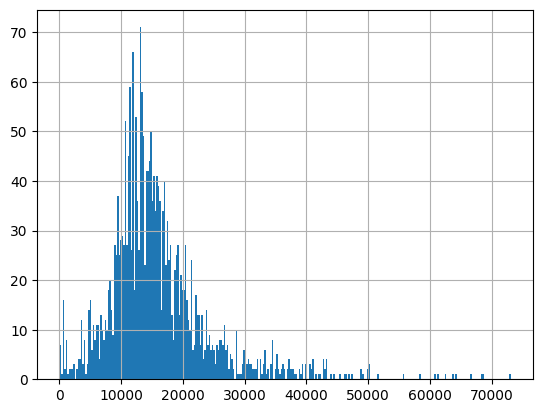

In [64]:
df8['precio'].hist(bins=300)

Utilizando un logaritmo intentamos conseguir una distribución normal.

<Axes: >

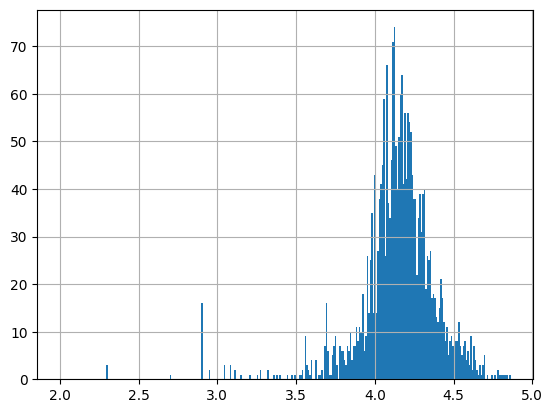

In [65]:
df8['log_precio'] = np.log10(df['precio'])
df8['log_precio'].hist(bins=300)

<Axes: xlabel='log_precio'>

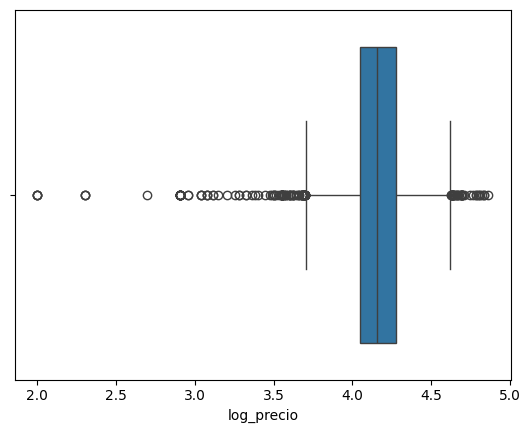

In [66]:
sns.boxplot(x=df8['log_precio'])

No se consigue la distribución completamente normal, entonces se dejará la variable precio original.

In [67]:
del(df8['log_precio'])

### 3.1.3. <a id='toc3_1_3_'></a>[Análisis entre el Target y las Variables Independientes](#toc0_)

In [68]:
df8.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,fecha_registro_MES,fecha_venta_MES
0,118,140411.0,100.0,black,Unknown,True,True,False,Unknown,True,Unknown,True,Unknown,11300.0,2161,2,1
2,320,183297.0,120.0,white,Unknown,False,False,False,Unknown,True,False,True,False,10200.0,2132,4,2
12,Others,132025.0,135.0,blue,Unknown,True,Unknown,False,False,True,True,True,Unknown,21700.0,1461,3,3
13,Others,77061.0,135.0,black,Unknown,True,True,False,Unknown,True,True,True,True,36300.0,943,8,3
14,Others,174631.0,120.0,Unknown,convertible,True,True,False,False,False,False,True,False,10500.0,3377,1,4


In [69]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       2310 non-null   object 
 1   km                           2310 non-null   float64
 2   potencia                     2310 non-null   float64
 3   color                        2310 non-null   object 
 4   tipo_coche                   2310 non-null   object 
 5   volante_regulable            2310 non-null   object 
 6   aire_acondicionado           2310 non-null   object 
 7   camara_trasera               2310 non-null   object 
 8   asientos_traseros_plegables  2310 non-null   object 
 9   elevalunas_electrico         2310 non-null   object 
 10  bluetooth                    2310 non-null   object 
 11  gps                          2310 non-null   bool   
 12  alerta_lim_velocidad         2310 non-null   object 
 13  precio                 

En un diagrama de violín para variables categóricas, debes fijarte en:

1. **Distribución de Datos**: Observa la forma del violín para cada categoría, mostrando cómo se distribuyen los datos.
2. **Densidad**: Analiza las áreas más anchas para entender dónde se concentra la mayor parte de los datos.
3. **Medias y Medianas**: Identifica las líneas de la mediana y los puntos de la media para comparar las ubicaciones centrales.
4. **Comparación entre Categorías**: Compara las formas y densidades de los violines entre diferentes categorías para identificar diferencias en las distribuciones.

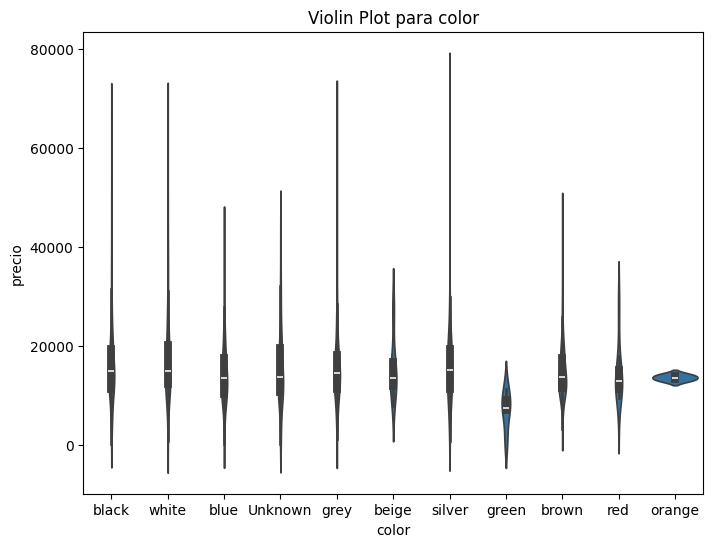

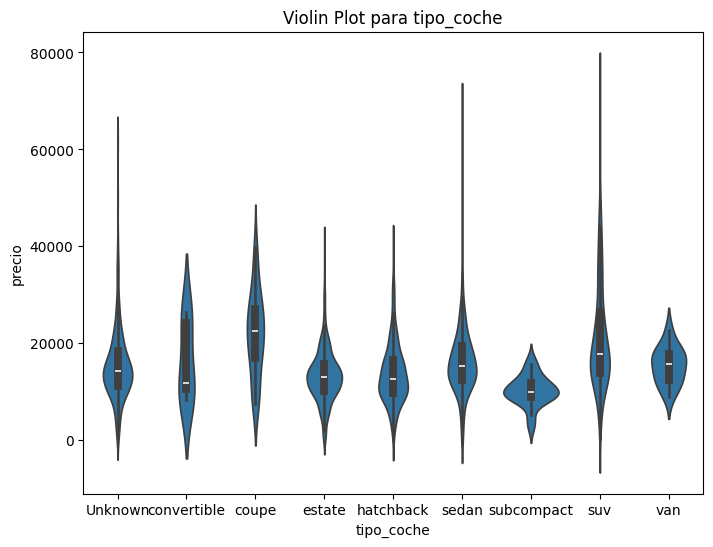

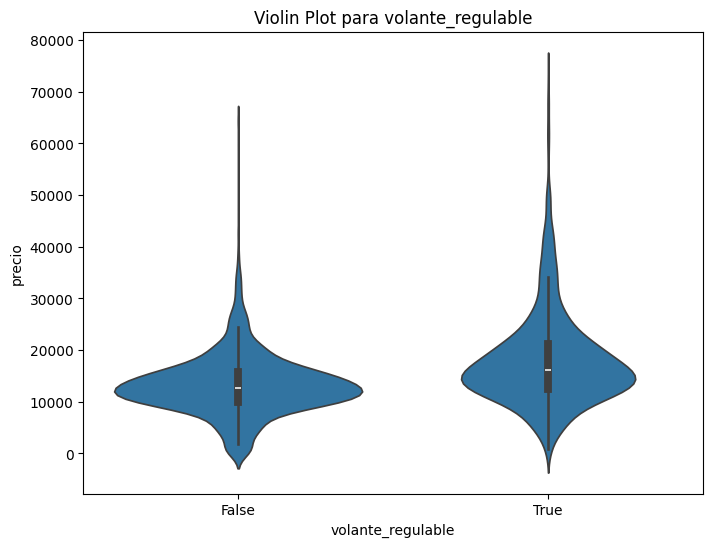

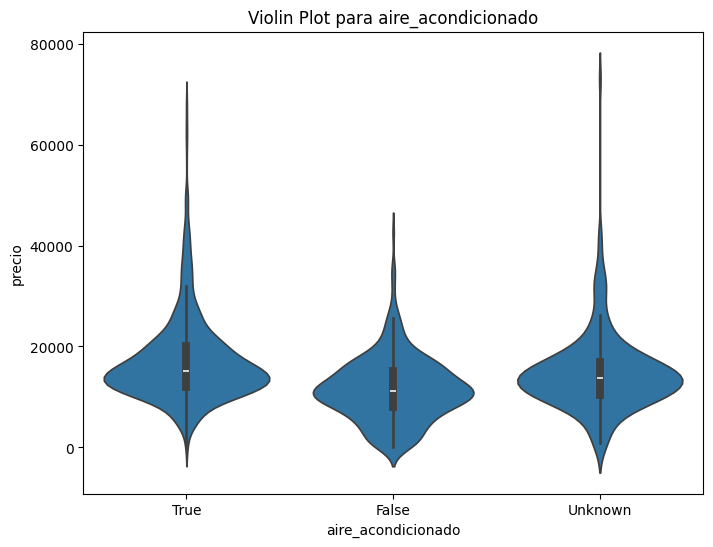

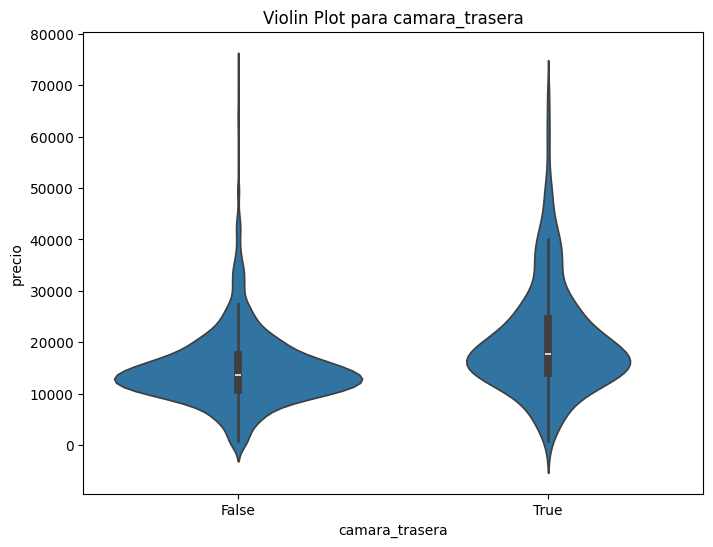

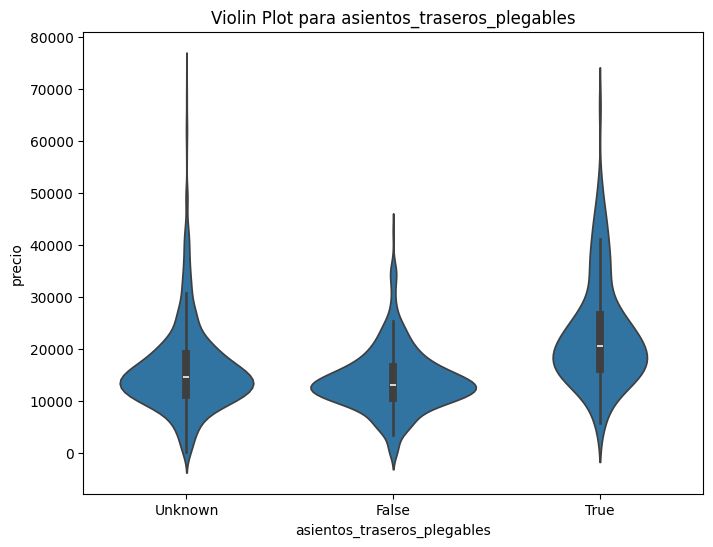

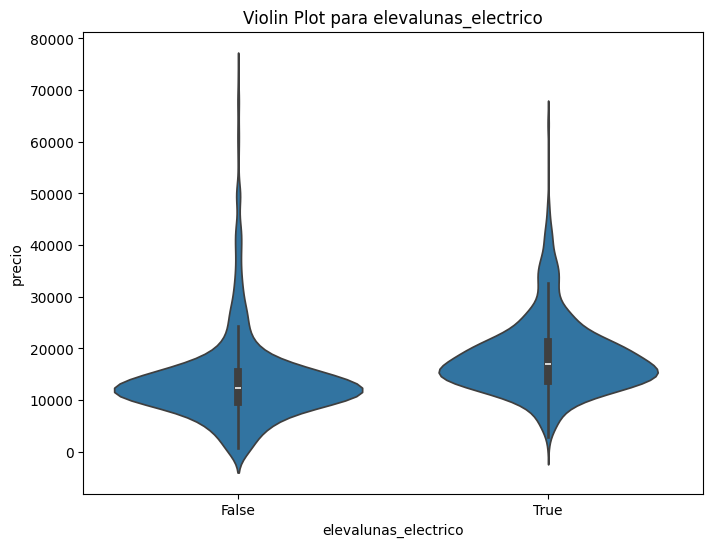

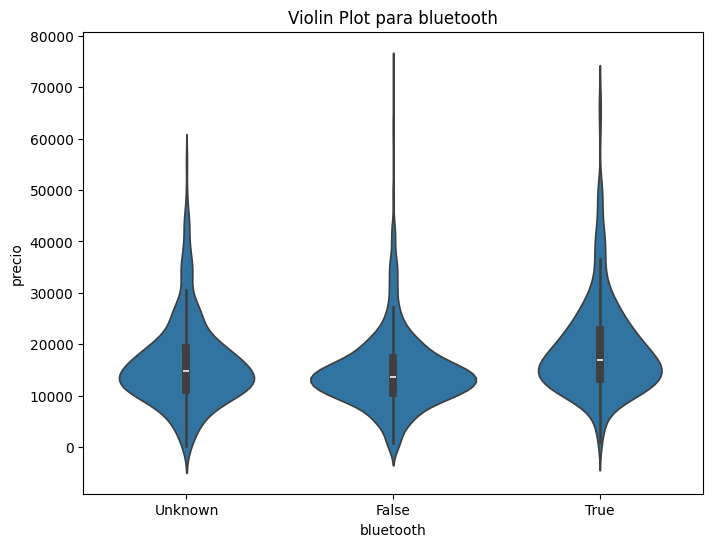

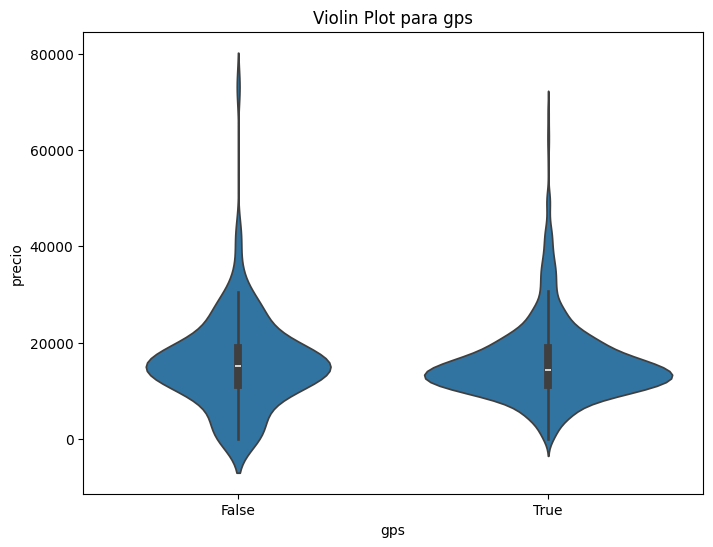

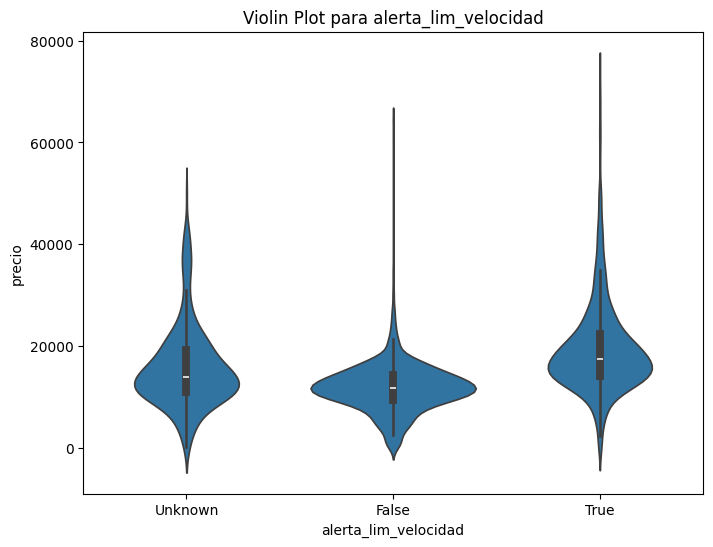

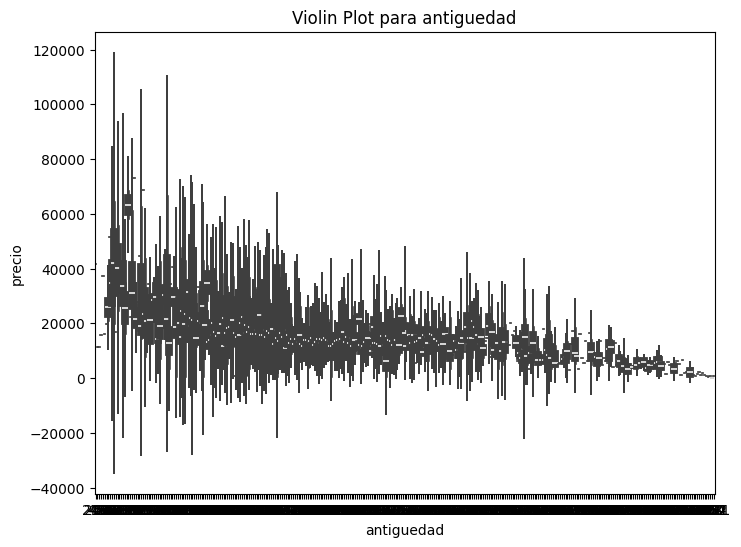

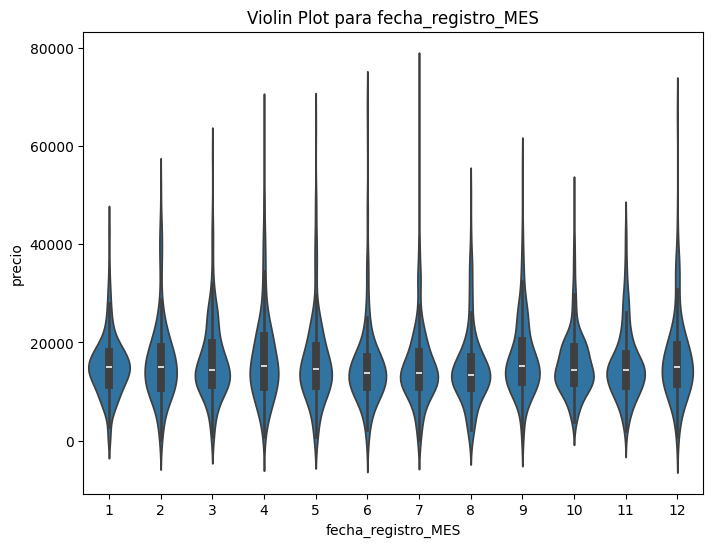

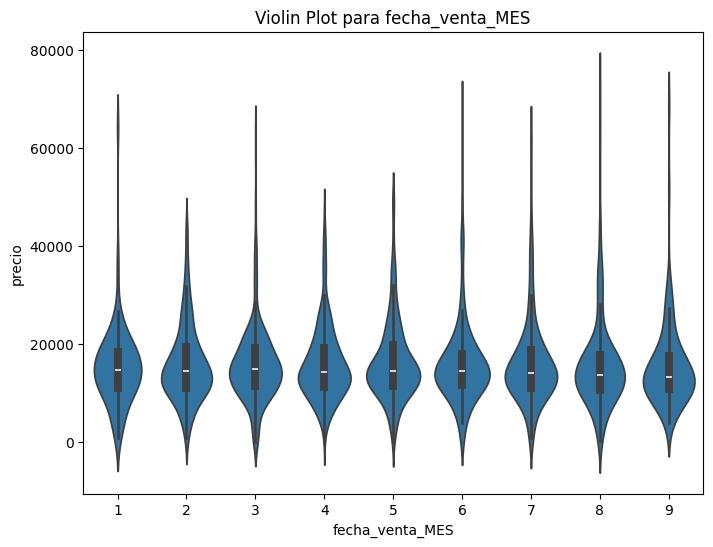

In [70]:
no_print = ['modelo', 'km', 'potencia', 'precio']
for col in df8.columns:
    if col not in no_print:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=col, y='precio', data = df8)
        plt.title(f'Violin Plot para {col}')
        plt.show()

No se observa ninguna discrepancia en el valor de los precios según las distintas variables.

In [71]:
df_cleaned = df8.copy()

# 4. <a id='toc4_'></a>[Categorizacion de columnas](#toc0_)

- **Numéricas**: 
  - Contienen valores numéricos.
  - Necesitan normalización o estandarización.

- **Booleanas**: 
  - Contienen valores `True`/`False` o `1`/`0`.
  - Pueden ser usadas directamente o transformadas en variables dummy.

- **Categóricas**: 
  - Contienen categorías discretas.
  - Se transforman mediante one-hot encoding o codificación de etiquetas.

- **Otras**: 
  - Incluyen datos textuales, fechas, etc.
  - Requieren transformaciones específicas como tokenización o descomposición en componentes.

**Importancia**: La correcta categorización y transformación de datos mejora el rendimiento del modelo, reduce errores y facilita la interpretación de los resultados.


In [72]:
df9 = df_cleaned.copy()

### 4.1.1. <a id='toc4_1_1_'></a>[Funciones](#toc0_)

In [73]:
def obtener_lista_variables(dataset, target):
    """
    Esta funcion toma un DataFrame de pandas 'dataset' y una lista de nombres de columnas 'target'.
    Clasifica las columnas del DataFrame en cuatro listas basadas en su tipo de datos:
    - 'lista_numericas': Columnas con datos numéricos (enteros o flotantes) que no tienen exactamente dos valores únicos.
    - 'lista_boolean': Columnas con datos booleanos o numéricos (enteros o flotantes) que tienen exactamente dos valores únicos.
    - 'lista_categoricas': Columnas con datos de tipo objeto (generalmente cadenas) que no están en 'target'.
    - 'lista_otros': Columnas que no encajan en ninguna de las categorías anteriores.

    Parametros:
    dataset (pandas.DataFrame): DataFrame que contiene los datos.
    target (list): Lista de nombres de columnas que se deben excluir de las categorías 'categoricas' y 'otros'.

    Retorno:
    tuple: Cuatro listas que contienen los nombres de las columnas clasificadas en 'numericas', 'boolean', 'categoricas' y 'otros'.
    """

    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    lista_otros=[]

    for i in dataset:
      if i not in target:
            if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2:
                  lista_numericas.append(i)
            elif  ((dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2) or dataset[i].dtype.kind=="b":
                  lista_boolean.append(i)
            elif  (dataset[i].dtype.kind=="O")  and i not in target:
                  lista_categoricas.append(i)
            else:
                  lista_otros.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas, lista_otros

### 4.1.2. <a id='toc4_1_2_'></a>[Modificaciones en los tipos de datos](#toc0_)

In [74]:
numericas, booleanas, categoricas, otros = obtener_lista_variables(df9, ['precio', 'log_precio'])

In [75]:
numericas, booleanas, categoricas, otros

(['km', 'potencia', 'antiguedad', 'fecha_registro_MES', 'fecha_venta_MES'],
 ['gps'],
 ['modelo',
  'color',
  'tipo_coche',
  'volante_regulable',
  'aire_acondicionado',
  'camara_trasera',
  'asientos_traseros_plegables',
  'elevalunas_electrico',
  'bluetooth',
  'alerta_lim_velocidad'],
 [])

In [76]:
for i in booleanas:
    df9[i] = df9[i].astype(bool)

In [77]:
df9.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,fecha_registro_MES,fecha_venta_MES
0,118,140411.0,100.0,black,Unknown,True,True,False,Unknown,True,Unknown,True,Unknown,11300.0,2161,2,1
2,320,183297.0,120.0,white,Unknown,False,False,False,Unknown,True,False,True,False,10200.0,2132,4,2
12,Others,132025.0,135.0,blue,Unknown,True,Unknown,False,False,True,True,True,Unknown,21700.0,1461,3,3
13,Others,77061.0,135.0,black,Unknown,True,True,False,Unknown,True,True,True,True,36300.0,943,8,3
14,Others,174631.0,120.0,Unknown,convertible,True,True,False,False,False,False,True,False,10500.0,3377,1,4


In [78]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       2310 non-null   object 
 1   km                           2310 non-null   float64
 2   potencia                     2310 non-null   float64
 3   color                        2310 non-null   object 
 4   tipo_coche                   2310 non-null   object 
 5   volante_regulable            2310 non-null   object 
 6   aire_acondicionado           2310 non-null   object 
 7   camara_trasera               2310 non-null   object 
 8   asientos_traseros_plegables  2310 non-null   object 
 9   elevalunas_electrico         2310 non-null   object 
 10  bluetooth                    2310 non-null   object 
 11  gps                          2310 non-null   bool   
 12  alerta_lim_velocidad         2310 non-null   object 
 13  precio                 

In [79]:
df_goodtypes = df9.copy()

# 5. <a id='toc5_'></a>[Codificación OneHot](#toc0_)

La **codificación One-Hot** transforma datos categóricos en un formato binario que los modelos de Machine Learning pueden procesar fácilmente.

#### 5.1.1.1. <a id='toc5_1_1_1_'></a>[¿Cómo Funciona?](#toc0_)

1. **Crear Columnas Binarias**: Para cada categoría, se crea una nueva columna con valores `0` o `1`.
2. **Asignar Valores**: Colocar un `1` en la columna correspondiente a la categoría y `0` en las demás.

#### 5.1.1.2. <a id='toc5_1_1_2_'></a>[Importancia](#toc0_)

- **Evita Interpretaciones Erróneas**: No introduce orden implícito.
- **Mejora el Rendimiento**: Facilita el procesamiento por parte de los algoritmos.
- **Preserva Información**: Cada categoría se representa de manera única.

La codificación One-Hot es esencial para convertir variables categóricas en un formato adecuado para el aprendizaje automático.


In [80]:
df_goodtypes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       2310 non-null   object 
 1   km                           2310 non-null   float64
 2   potencia                     2310 non-null   float64
 3   color                        2310 non-null   object 
 4   tipo_coche                   2310 non-null   object 
 5   volante_regulable            2310 non-null   object 
 6   aire_acondicionado           2310 non-null   object 
 7   camara_trasera               2310 non-null   object 
 8   asientos_traseros_plegables  2310 non-null   object 
 9   elevalunas_electrico         2310 non-null   object 
 10  bluetooth                    2310 non-null   object 
 11  gps                          2310 non-null   bool   
 12  alerta_lim_velocidad         2310 non-null   object 
 13  precio                 

In [81]:
categoricas

['modelo',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [82]:
def codificacion_OneHot(df, column_list):
    """
    Esta funcion realiza la codificacion One-Hot para las columnas especificadas en el DataFrame.

    Parametros:
    df (pd.DataFrame): El DataFrame que contiene los datos a codificar.
    column_list (list): Lista de nombres de columnas en el DataFrame que se deben codificar.

    Retorno:
    pd.DataFrame: El DataFrame con las columnas originales reemplazadas por columnas One-Hot codificadas.
    dict: Un diccionario que contiene los codificadores OneHotEncoder utilizados para cada columna.
    """
    encoders = {}  # Dictionary to store encoders
    one_hot_dfs = []  # List to store one-hot encoded dataframes
    
    for column in column_list:
        # Ensure the column is of string type
        df[column] = df[column].astype(str)
        
        # Create and fit OneHotEncoder
        ohe = OneHotEncoder()
        one_hot_encoded = ohe.fit_transform(df[[column]]).toarray()
        
        # Store encoder in dictionary
        encoders[column] = ohe
        
        # Create a dataframe for the one-hot encoded column
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out([column]))
        one_hot_dfs.append(one_hot_df)
        
        # Drop the original column from the DataFrame
        df = df.drop(column, axis=1)

    # Concatenate all one-hot encoded dataframes horizontally
    result_df = pd.concat([df] + one_hot_dfs, axis=1)
    
    # Identify only the one-hot encoded columns and convert them to boolean type
    one_hot_columns = [col for col in result_df.columns if any(col.startswith(prefix) for prefix in column_list)]
    result_df[one_hot_columns] = result_df[one_hot_columns].astype(bool)
    
    return result_df, encoders

In [83]:
result_df, encoders = codificacion_OneHot(df_goodtypes, categoricas)

In [84]:
result_df.head()

,km,potencia,gps,precio,antiguedad,fecha_registro_MES,fecha_venta_MES,modelo_116,modelo_118,modelo_316,...,asientos_traseros_plegables_True,asientos_traseros_plegables_Unknown,elevalunas_electrico_False,elevalunas_electrico_True,bluetooth_False,bluetooth_True,bluetooth_Unknown,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_Unknown
0,140411.0,100.0,True,11300.0,2161.0,2.0,1.0,False,True,False,...,False,True,False,True,False,False,True,False,False,True
2,183297.0,120.0,True,10200.0,2132.0,4.0,2.0,False,False,False,...,False,False,False,True,False,True,False,False,False,True
12,132025.0,135.0,True,21700.0,1461.0,3.0,3.0,False,True,False,...,False,True,True,False,True,False,False,False,False,True
13,77061.0,135.0,True,36300.0,943.0,8.0,3.0,False,False,False,...,False,True,False,True,True,False,False,True,False,False
14,174631.0,120.0,True,10500.0,3377.0,1.0,4.0,False,False,False,...,False,False,False,True,True,False,False,True,False,False


In [85]:
encoders

{'modelo': OneHotEncoder(),
 'color': OneHotEncoder(),
 'tipo_coche': OneHotEncoder(),
 'volante_regulable': OneHotEncoder(),
 'aire_acondicionado': OneHotEncoder(),
 'camara_trasera': OneHotEncoder(),
 'asientos_traseros_plegables': OneHotEncoder(),
 'elevalunas_electrico': OneHotEncoder(),
 'bluetooth': OneHotEncoder(),
 'alerta_lim_velocidad': OneHotEncoder()}

In [86]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3526 entries, 0 to 2308
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   km                                   2310 non-null   float64
 1   potencia                             2310 non-null   float64
 2   gps                                  2310 non-null   object 
 3   precio                               2310 non-null   float64
 4   antiguedad                           2310 non-null   float64
 5   fecha_registro_MES                   2310 non-null   float64
 6   fecha_venta_MES                      2310 non-null   float64
 7   modelo_116                           3526 non-null   bool   
 8   modelo_118                           3526 non-null   bool   
 9   modelo_316                           3526 non-null   bool   
 10  modelo_318                           3526 non-null   bool   
 11  modelo_320                         

### 5.1.2. <a id='toc5_1_2_'></a>[Segunda comprobación de correlaciones](#toc0_)

Comprobamos de nuevo las correlaciones:

In [87]:
result_df.shape

(3526, 57)

In [88]:
def columnas_correlacionadas_fuera_umbrales(dataset, umbral=0.8):
    # Verificar si el parámetro 'dataset' es un DataFrame de pandas
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("El dataset debe ser un DataFrame de pandas.")

    # Calcular las correlaciones entre las columnas
    correlaciones = dataset.corr()

    # Encontrar las columnas cuya correlación está fuera del umbral
    columnas_fuera_umbrales = []
    for col1 in correlaciones.columns:
        for col2 in correlaciones.columns:
            if col1 != col2 and (correlaciones.loc[col1, col2] > umbral or correlaciones.loc[col1, col2] < -umbral):
                # Asegurarse de que los pares de columnas no se repitan al introducirlos al revés
                par_columnas = tuple(sorted([col1, col2]))
                correlacion = correlaciones.loc[col1, col2]
                columnas_fuera_umbrales.append({
                    'col1': col1,
                    'col2': col2,
                    'correlacion': correlacion
                })

    return columnas_fuera_umbrales

def contar_apariciones_columnas(correlaciones):
    # Inicializar un diccionario para contar las apariciones de cada columna
    apariciones = {}
    for item in correlaciones:
        col1 = item['col1']
        col2 = item['col2']

        apariciones[col1] = apariciones.get(col1, 0) + 1
        apariciones[col2] = apariciones.get(col2, 0) + 1

    df_apariciones = pd.DataFrame(list(apariciones.items()), columns=['Columna', 'Apariciones'])
    df_apariciones = df_apariciones.sort_values(by='Apariciones', ascending=False)

    return df_apariciones

In [89]:
lista = columnas_correlacionadas_fuera_umbrales(result_df)
columnas_eliminadas = []

In [90]:
while lista != []:
    df_apariciones = contar_apariciones_columnas(lista)
    columna_max_apariciones = df_apariciones.loc[df_apariciones['Apariciones'].idxmax(), 'Columna']

    if columna_max_apariciones not in columnas_eliminadas:
        columnas_eliminadas.append(columna_max_apariciones)

    del(result_df[columna_max_apariciones])
        
    lista = columnas_correlacionadas_fuera_umbrales(result_df)


print(columnas_eliminadas)


['color_orange', 'color_green', 'tipo_coche_convertible', 'tipo_coche_van', 'tipo_coche_coupe', 'color_beige', 'color_red', 'tipo_coche_subcompact', 'modelo_118', 'modelo_530', 'modelo_X5', 'modelo_316', 'modelo_525', 'modelo_X1', 'color_silver', 'modelo_116', 'modelo_X3', 'asientos_traseros_plegables_True', 'color_brown']


In [91]:
result_df.shape

(3526, 38)

In [92]:
result_df = result_df.reset_index(drop=True)

In [93]:
result_df.head()

,km,potencia,gps,precio,antiguedad,fecha_registro_MES,fecha_venta_MES,modelo_318,modelo_320,modelo_520,...,asientos_traseros_plegables_False,asientos_traseros_plegables_Unknown,elevalunas_electrico_False,elevalunas_electrico_True,bluetooth_False,bluetooth_True,bluetooth_Unknown,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_Unknown
0,140411.0,100.0,True,11300.0,2161.0,2.0,1.0,False,False,False,...,False,True,False,True,False,False,True,False,False,True
1,183297.0,120.0,True,10200.0,2132.0,4.0,2.0,False,False,False,...,True,False,False,True,False,True,False,False,False,True
2,132025.0,135.0,True,21700.0,1461.0,3.0,3.0,False,False,False,...,False,True,True,False,True,False,False,False,False,True
3,77061.0,135.0,True,36300.0,943.0,8.0,3.0,False,True,False,...,False,True,False,True,True,False,False,True,False,False
4,174631.0,120.0,True,10500.0,3377.0,1.0,4.0,False,False,False,...,True,False,False,True,True,False,False,True,False,False


# 6. <a id='toc6_'></a>[Conclusiones del dataset](#toc0_)

- <u>**Objetivo del modelo:**</u> Estimar el **precio de venta** de un automóvil. Utiliza características específicas del vehículo para calcular su valor en el mercado.

- <u>**Marca de los vehículos:**</u> El modelo está diseñado exclusivamente para **BMW**. Esto asegura que las predicciones se ajusten a las características particulares de esta marca.

- <u>**Tipo de combustible:**</u> El enfoque está en vehículos con **motor diésel**. El modelo ajusta las predicciones basándose en características y patrones asociados a este tipo de combustible.

- <u>**Datos de registro:**</u> Se utilizan datos de vehículos **registrados en 1999**. Esto define el contexto histórico y técnico del modelo, influyendo en la precisión de las predicciones para ese periodo.

- <u>**Datos de ventas:**</u> El entrenamiento del modelo se basa en **ventas realizadas en 2018**. Esto permite al modelo ajustar sus predicciones a las condiciones del mercado y precios específicos de ese año.

# 7. <a id='toc7_'></a>[Herramientas para documentar en Word](#toc0_)

Como se nos solicitaba un documento Word con las conclusiones más relevantes, se ha genera una función que permite extraer datos de interes.

In [94]:
def comparar_dataframes(df1, df2):
    """
    Compara las columnas de dos DataFrames para identificar cuáles columnas han sido eliminadas
    o añadidas entre los dos DataFrames.

    Parametros:
    df1 (pandas.DataFrame): Primer DataFrame para comparar.
    df2 (pandas.DataFrame): Segundo DataFrame para comparar.

    Retorno:
    dict: Un diccionario con dos claves:
        - 'eliminadas': Lista de columnas que están en df1 pero no en df2.
        - 'anadidas': Lista de columnas que están en df2 pero no en df1.
    """
    # Obtener las columnas presentes en ambos DataFrames
    columnas_comunes = set(df1.columns) & set(df2.columns)

    # Identificar las columnas eliminadas y añadidas
    columnas_eliminadas = [col for col in df1.columns if col not in columnas_comunes]
    columnas_anadidas = [col for col in df2.columns if col not in columnas_comunes]

    # Crear un diccionario con las categorías "eliminadas" y "añadidas"
    resultado = {
        "eliminadas": columnas_eliminadas,
        "añadidas": columnas_anadidas
    }

    return resultado

In [95]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   km                                   2310 non-null   float64
 1   potencia                             2310 non-null   float64
 2   gps                                  2310 non-null   object 
 3   precio                               2310 non-null   float64
 4   antiguedad                           2310 non-null   float64
 5   fecha_registro_MES                   2310 non-null   float64
 6   fecha_venta_MES                      2310 non-null   float64
 7   modelo_318                           3526 non-null   bool   
 8   modelo_320                           3526 non-null   bool   
 9   modelo_520                           3526 non-null   bool   
 10  modelo_Others                        3526 non-null   bool   
 11  color_Unknown                 

In [96]:
result_df.columns.to_list()

['km',
 'potencia',
 'gps',
 'precio',
 'antiguedad',
 'fecha_registro_MES',
 'fecha_venta_MES',
 'modelo_318',
 'modelo_320',
 'modelo_520',
 'modelo_Others',
 'color_Unknown',
 'color_black',
 'color_blue',
 'color_grey',
 'color_white',
 'tipo_coche_Unknown',
 'tipo_coche_estate',
 'tipo_coche_hatchback',
 'tipo_coche_sedan',
 'tipo_coche_suv',
 'volante_regulable_False',
 'volante_regulable_True',
 'aire_acondicionado_False',
 'aire_acondicionado_True',
 'aire_acondicionado_Unknown',
 'camara_trasera_False',
 'camara_trasera_True',
 'asientos_traseros_plegables_False',
 'asientos_traseros_plegables_Unknown',
 'elevalunas_electrico_False',
 'elevalunas_electrico_True',
 'bluetooth_False',
 'bluetooth_True',
 'bluetooth_Unknown',
 'alerta_lim_velocidad_False',
 'alerta_lim_velocidad_True',
 'alerta_lim_velocidad_Unknown']

## 7.1. <a id='toc7_1_'></a>[Filas eliminadas](#toc0_)

In [97]:
filas_eliminadas = bmw.shape[0] - result_df.shape[0]
filas_eliminadas

1317

# 8. <a id='toc8_'></a>[Guardado del Dataset](#toc0_)

In [98]:
result_df.to_csv('../datasets/bmw_pricing_preprocessed.csv')